In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
pd.set_option('display.max_columns', None);
pd.set_option('display.max_rows', None);
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [3]:
df = pd.read_csv("churn.csv", index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [7]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [9]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [10]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
churn = df.loc[df["Exited"]==1]

In [12]:
not_churn = df.loc[df["Exited"]==0]

In [13]:
# Frequency of not_churn group according to Tenure
not_churn["Tenure"].value_counts().sort_values()

0     318
10    389
6     771
9     771
4     786
3     796
5     803
1     803
8     828
2     847
7     851
Name: Tenure, dtype: int64

In [14]:
churn["Tenure"].value_counts().sort_values()

0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
9     213
3     213
1     232
Name: Tenure, dtype: int64

In [15]:
# Frequency of not_churn group according to NumOfProducts
not_churn["NumOfProducts"].value_counts().sort_values()

3      46
1    3675
2    4242
Name: NumOfProducts, dtype: int64

In [16]:
# Frequency of churn group according to NumOfProducts
churn["NumOfProducts"].value_counts().sort_values()

4      60
3     220
2     348
1    1409
Name: NumOfProducts, dtype: int64

In [17]:
not_churn["HasCrCard"].value_counts()

1    5631
0    2332
Name: HasCrCard, dtype: int64

In [18]:
churn["HasCrCard"].value_counts()

1    1424
0     613
Name: HasCrCard, dtype: int64

In [19]:
not_churn["IsActiveMember"].value_counts()

1    4416
0    3547
Name: IsActiveMember, dtype: int64

In [20]:
churn["IsActiveMember"].value_counts()

0    1302
1     735
Name: IsActiveMember, dtype: int64

In [21]:
# Frequency of not_churn group according to Geography
not_churn.Geography.value_counts().sort_values()

Germany    1695
Spain      2064
France     4204
Name: Geography, dtype: int64

In [22]:
# Frequency of churn group according to Geography
churn.Geography.value_counts().sort_values()

Spain      413
France     810
Germany    814
Name: Geography, dtype: int64

In [23]:
# Frequency of not_churn group according to Gender
not_churn.Gender.value_counts()

Male      4559
Female    3404
Name: Gender, dtype: int64

In [24]:
churn.Gender.value_counts()

Female    1139
Male       898
Name: Gender, dtype: int64

In [25]:
# Let's examine the credit score of the not_churn group
not_churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count   7963.00
mean     651.85
std       95.65
min      405.00
5%       492.00
25%      585.00
50%      653.00
75%      718.00
90%      778.00
95%      812.00
99%      850.00
max      850.00
Name: CreditScore, dtype: float64

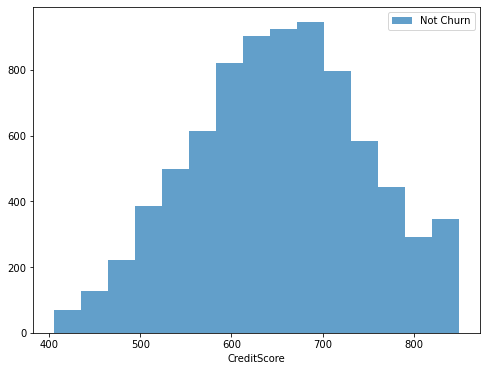

In [26]:
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore')
plt.hist(not_churn["CreditScore"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

In [27]:
# Let's examine the credit score of the churn group
churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count   2037.00
mean     645.35
std      100.32
min      350.00
5%       479.00
25%      578.00
50%      646.00
75%      716.00
90%      776.40
95%      812.20
99%      850.00
max      850.00
Name: CreditScore, dtype: float64

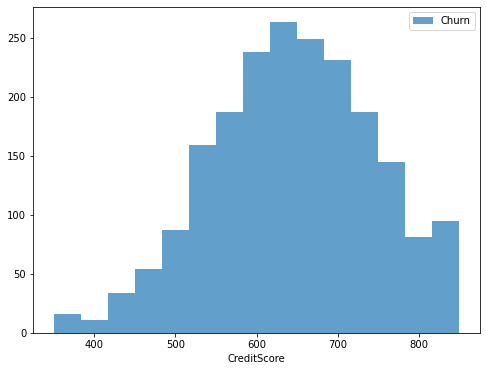

In [28]:
# distribution of the Credit Score for churn
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore')
plt.hist(churn["CreditScore"],bins=15, alpha=0.7, label='Churn')
plt.legend(loc='upper right')
plt.show()

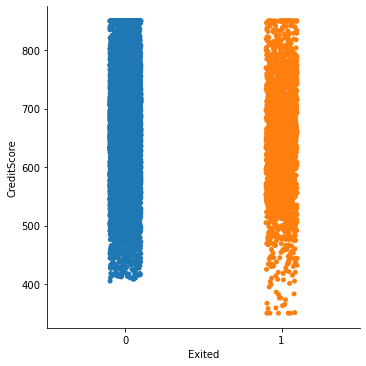

In [29]:
sns.catplot("Exited", "CreditScore", data = df)

In [30]:
# examining the age of the not_churn group
not_churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count   7963.00
mean      37.41
std       10.13
min       18.00
5%        24.00
25%       31.00
50%       36.00
75%       41.00
90%       49.00
95%       59.00
99%       73.00
max       92.00
Name: Age, dtype: float64

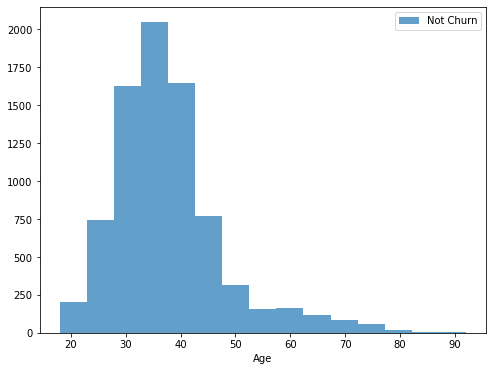

In [31]:
# distribution of the Age for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.hist(not_churn["Age"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

In [32]:
# examine the age of the churn group
churn["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count   2037.00
mean      44.84
std        9.76
min       18.00
5%        29.00
25%       38.00
50%       45.00
75%       51.00
90%       58.00
95%       61.00
99%       68.00
max       84.00
Name: Age, dtype: float64

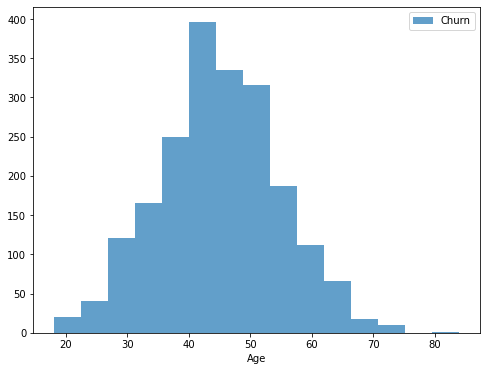

In [33]:
# distribution of the Age for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.hist(churn["Age"],bins=15, alpha=0.7, label='Churn')
plt.legend(loc='upper right')
plt.show()

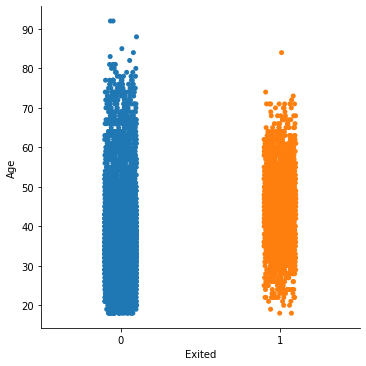

In [34]:
sns.catplot("Exited", "Age", data = df)

In [35]:
# examining the Balance of the not_churn group
not_churn["Balance"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count     7963.00
mean     72745.30
std      62848.04
min          0.00
5%           0.00
25%          0.00
50%      92072.68
75%     126410.28
90%     148730.30
95%     161592.60
99%     183753.91
max     221532.80
Name: Balance, dtype: float64

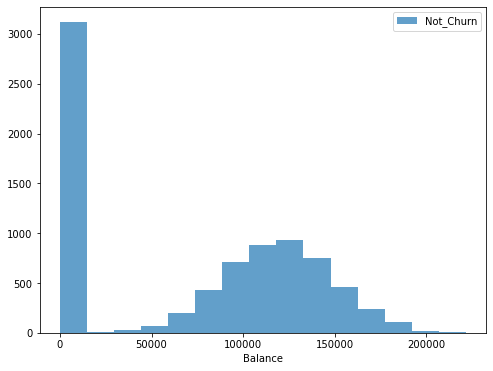

In [36]:
# distribution of the Balance for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('Balance')
plt.hist(not_churn["Balance"],bins=15, alpha=0.7, label='Not_Churn')
plt.legend(loc='upper right')
plt.show()

In [37]:
# examining the Balance of the churn group
churn["Balance"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count     2037.00
mean     91108.54
std      58360.79
min          0.00
5%           0.00
25%      38340.02
50%     109349.29
75%     131433.33
90%     152080.62
95%     167698.24
99%     197355.29
max     250898.09
Name: Balance, dtype: float64

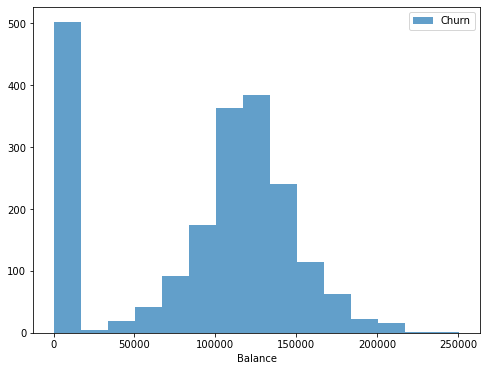

In [38]:
# distribution of the Balance for churn
plt.figure(figsize=(8,6))
plt.xlabel('Balance')
plt.hist(churn["Balance"],bins=15, alpha=0.7, label='Churn')
plt.legend(loc='upper right')
plt.show()

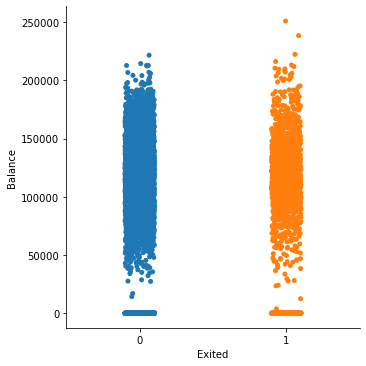

In [39]:
sns.catplot("Exited", "Balance", data = df)

In [40]:
# examining the EstimatedSalary of the not_churn group
not_churn["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count     7963.00
mean     99738.39
std      57405.59
min         90.07
5%        9773.54
25%      50783.49
50%      99645.04
75%     148609.96
90%     179453.21
95%     190107.56
99%     198131.47
max     199992.48
Name: EstimatedSalary, dtype: float64

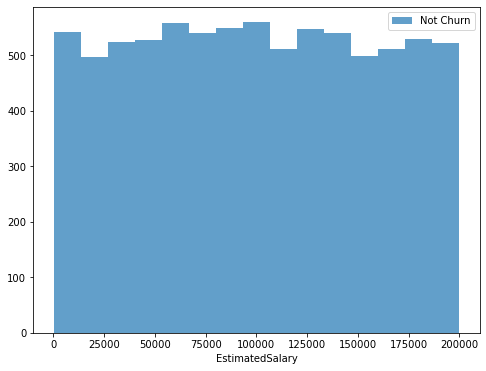

In [41]:
# distribution of the Balance for churn
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
plt.hist(not_churn["EstimatedSalary"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

In [42]:
# examining the EstimatedSalary of the churn group
churn["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count     2037.00
mean    101465.68
std      57912.42
min         11.58
5%       10030.76
25%      51907.72
50%     102460.84
75%     152422.91
90%     180169.39
95%     190328.98
99%     197717.30
max     199808.10
Name: EstimatedSalary, dtype: float64

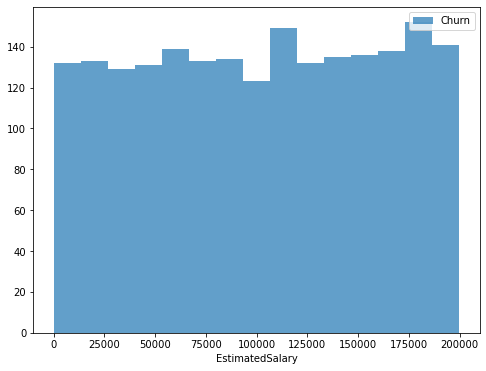

In [43]:
# distribution of the EstimatedSalary for churn
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
plt.hist(churn["EstimatedSalary"],bins=15, alpha=0.7, label='Churn')
plt.legend(loc='upper right')
plt.show()

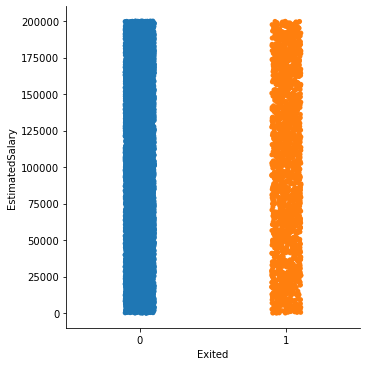

In [44]:
sns.catplot("Exited", "EstimatedSalary", data = df)

<AxesSubplot:>

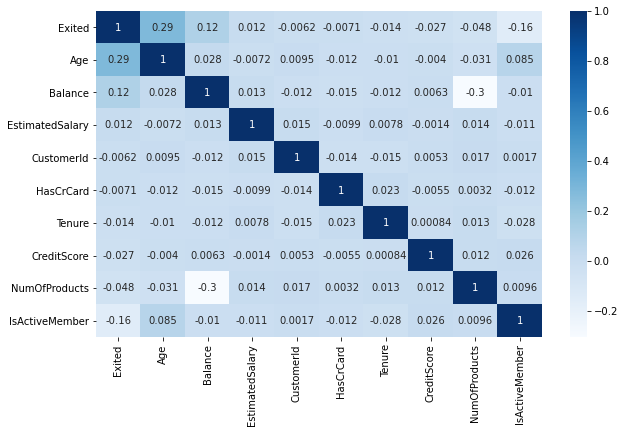

In [45]:
k=10
cols=df.corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True, cmap='Blues')

In [46]:
print(df.isnull().sum())
print(df.shape)

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
(10000, 13)


In [47]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
#determine the threshold value
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [49]:
#any outliers
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [50]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

CreditScore has  None Outliers
Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


In [52]:
list = ["Gender", "Geography"]
df = pd.get_dummies(df, columns=list,drop_first = False)

In [53]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [54]:
df = df.drop(["CustomerId","Surname"], axis = 1)

In [55]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)
# Models for Classification
models = [('LR', LogisticRegression(random_state=123456)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456)),
          ('GB', GradientBoostingClassifier(random_state = 12345)),
          ("LightGBM", LGBMClassifier(random_state=123456))]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.789800 (0.006645)
KNN: 0.765000 (0.009088)
CART: 0.791200 (0.012488)
RF: 0.859500 (0.007103)
GB: 0.865100 (0.009628)
LightGBM: 0.861300 (0.008075)


In [56]:
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[1516,  231],
       [  57,  196]], dtype=int64)

In [57]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  196
True Negative :  1516
False Positive:  231
False Negative:  57


In [58]:
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1747
           1       0.46      0.77      0.58       253

    accuracy                           0.86      2000
   macro avg       0.71      0.82      0.74      2000
weighted avg       0.90      0.86      0.87      2000



In [59]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

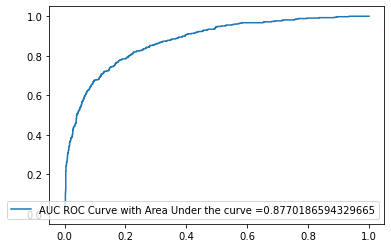

In [60]:
generate_auc_roc_curve(model_GB, X_test)


In [61]:
lgb_model = LGBMClassifier()
# Model Tuning
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X, y)

In [62]:
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)

In [63]:
models = [("LightGBM", lgbm_tuned),
          ("GB",gbm_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LightGBM: 0.865400 (0.008616)
GB: 0.864900 (0.008479)


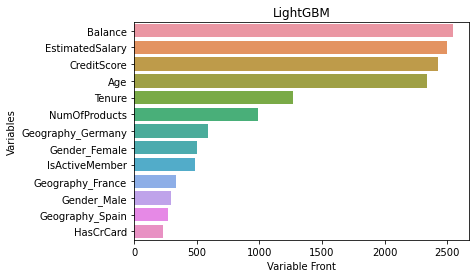

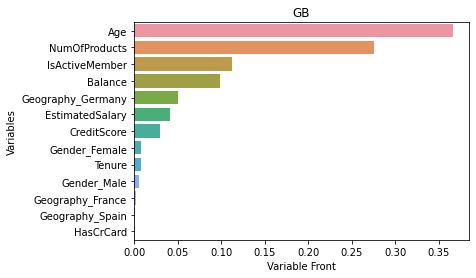

In [64]:
for name, model in models:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Variable Front')
        plt.ylabel('Variables')
        plt.title(name)
        plt.show()

In [67]:
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(base, file)